In [1]:
import pandas as pd
import numpy as np
import math


In [6]:
pip install yahoo_fin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 112 kB 45.2 MB/s 
     |████████████████████████████████| 127 kB 42.3 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=23849015ca2db8ca00bdea0e9f0416f04e0ef128d5e0a9d081410a12b706e41e
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=8e739667424b12aef76077c9880f724e41b177c3258c12042d5a9b19f6de5408
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=06eab0d98e63ea827220ba7aeba600499bc2f847d41817b0dd957

In [2]:
from datetime import date
from matplotlib import pyplot as plt
import datetime as dt
from matplotlib import dates

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from yahoo_fin.stock_info import get_data

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

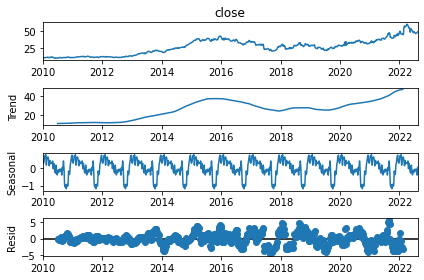

In [42]:
results = seasonal_decompose(KR_DF['close'])
results.plot();

In [41]:
KR_DF= get_data("KR", start_date="01/01/2010", end_date="08/18/2022", index_as_date = True, interval="1wk")
KR_DF

,open,high,low,close,adjclose,volume,ticker
2010-01-01,10.265000,10.325000,10.005000,10.225000,8.129104,78890200,KR
2010-01-08,10.230000,10.465000,10.060000,10.315000,8.200657,88398800,KR
2010-01-15,10.325000,10.915000,10.245000,10.760000,8.554440,87363400,KR
2010-01-22,10.725000,10.980000,10.620000,10.670000,8.482890,89196000,KR
2010-01-29,10.675000,10.875000,10.565000,10.580000,8.411335,75343000,KR
...,...,...,...,...,...,...,...
2022-07-15,47.849998,48.389999,45.790001,46.279999,46.025013,22308800,KR
2022-07-22,46.299999,46.669998,44.340000,46.040001,45.786339,26413900,KR
2022-07-29,45.770000,47.669998,45.520000,46.700001,46.442703,20743100,KR
2022-08-05,46.930000,47.790001,46.619999,47.189999,46.930000,20810000,KR


In [43]:
KR_DF.index.name = 'Date'

In [44]:
KR_DF.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

In [45]:
KR_DF.describe()

,open,high,low,close,adjclose,volume
count,659.000000,659.000000,659.000000,659.000000,659.000000,6.590000e+02
mean,26.199788,26.940630,25.533642,26.255440,23.861051,4.821399e+07
std,11.260351,11.648871,10.887807,11.263837,11.312914,2.308266e+07
min,9.790000,9.975000,9.540000,9.885000,7.927873,1.398800e+07
25%,14.490000,15.035000,14.345000,14.865000,12.584480,3.297695e+07
50%,26.870001,27.700001,25.895000,26.799999,24.479824,4.235330e+07
75%,34.415001,35.389999,33.619999,34.432501,31.477426,5.721100e+07
max,62.000000,62.779999,57.630001,59.880001,59.319912,2.180143e+08


In [46]:
KR_DF = KR_DF.sort_values('Date')

In [47]:
close_prices = KR_DF['close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [48]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [49]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 25)                2525      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4)

Epoch 1/4
468/468 [==============================] - 21s 37ms/step - loss: 0.0027
Epoch 2/4
468/468 [==============================] - 18s 38ms/step - loss: 0.0016
Epoch 3/4
468/468 [==============================] - 18s 39ms/step - loss: 0.0010
Epoch 4/4
468/468 [==============================] - 19s 41ms/step - loss: 8.8799e-04


In [51]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.7142892211448146

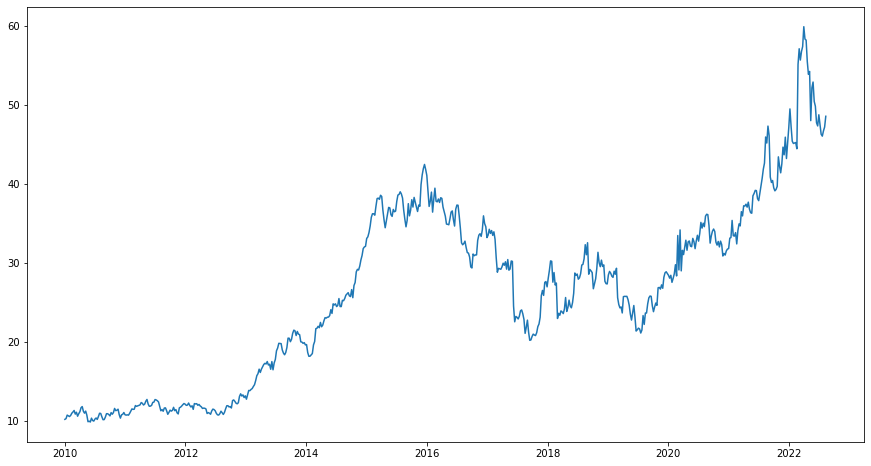

In [52]:
plt.figure(figsize=(15, 8))
plt.plot(KR_DF['close'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


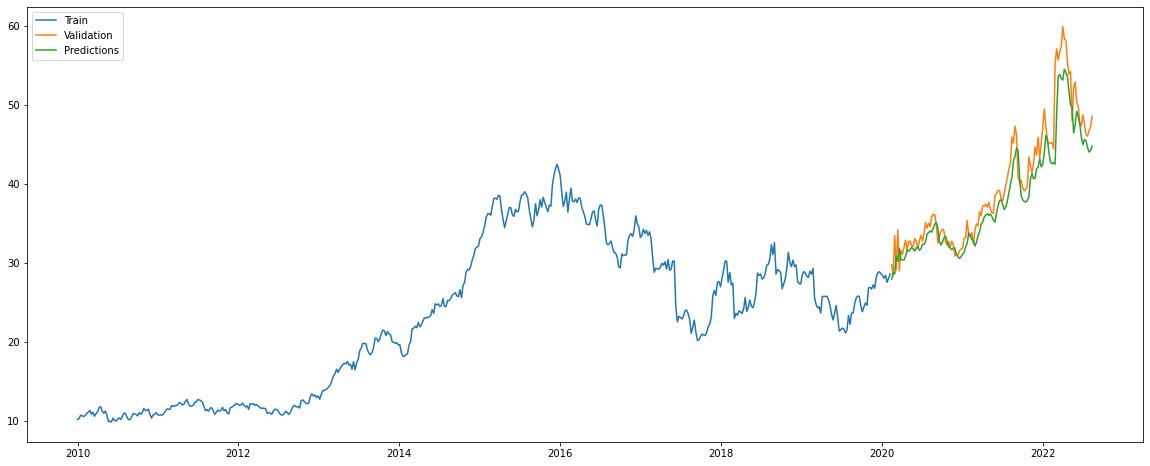

In [53]:
data = KR_DF.filter(['close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.plot(train)
plt.plot(validation[['close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'])

plt.show()